# Multivariate regression

*Goal:* Find a relationship that explains variable $y$ in terms of variables, $x_1, x_2, x_3$,...$x_n$

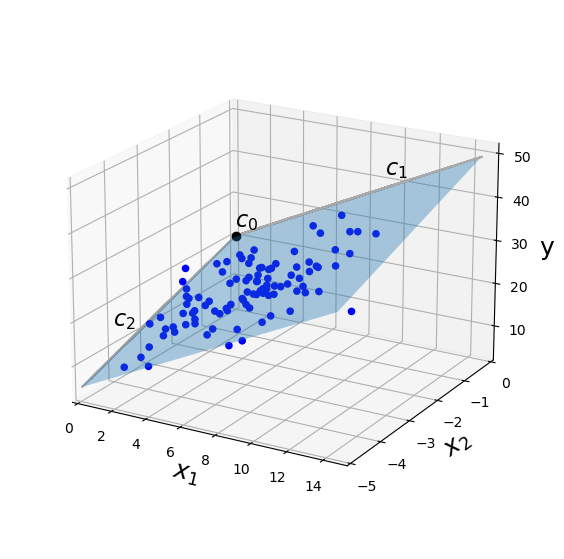

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

np.random.seed(232)
x = np.random.normal(6, 3, 100)
y = -np.random.normal(3, 1, 100)
z = 20 + 2*x + 3*y + np.random.normal(0, 2, 100)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('persp')

x_surf = np.arange(0, np.max(x), 0.1)
y_surf = np.arange(np.min(y), 0, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z_surf = 20 + 2*x_surf + 3*y_surf

ax.plot_surface(x_surf, y_surf,
                z_surf,
                rstride=1,
                cstride=1,
                alpha = 0.4)


ax.scatter(x, y, z,
           c='blue',
           marker='o',
           alpha=1)

ax.plot3D(x, 0*x, 20 + 2*x, color='darkgray')
ax.plot3D(x*0, y, 20 + 3*y, color='darkgray')

ax.plot3D(0, 0, 20, marker='o', color='k')
ax.text3D(0, 0, 22, '$c_0$', color='k', fontsize=16)
ax.text3D(9, 0, 41, '$c_1$', color='k', fontsize=16)
ax.text3D(0, -4, 15, '$c_2$', color='k', fontsize=16)

ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)

ax.set_xlim3d([0, 15])
ax.set_ylim3d([-5, 0]);

ax.set_zlabel('y', fontsize=18);
ax.view_init(elev=20.);
ax.set_box_aspect(aspect=None, zoom=0.9);

This three dimensional visualization shows how linear model based on two predictor variables, $x_1$ and $x_2$ can be used to model a response variable $y$. A constant and two slopes to define a 2D plane in 3D space with the equation

$$y = c_0 + c_1 x_1 + c_2 x_2$$

The sum of squared vertical distances between the model (plane) and observations of $y$ (dots) are minimized. Like fitting a line in 2D space, this procedure assumes the validity of a linear model.

## Example: Model for aragonite saturation state based on three other oceanographic variables

As a motivation for multiple linear regression, we consider a model for aragonite saturation state, $\Omega_A$. The study by Juranek et al. (2009), discussed on greater detail below, uses multiple linear regression to model $\Omega_A$ for surveys where it is not measured, using more commonly measured parameters. We know that $\Omega_A$ depends on both physical and biological processes, so one candidate for a model might be:

$y = c_0 + c_1x_1 + c_2x_2 + c_3x_3 $

where $y$ = $\Omega_A$

$x_1$ = temperature

$x_2$ = salinity

$x_3$ = dissolved oxygen

$k$ = 3 predictor variables

$N$ = 1011 samples

Because we have three predictor variables, it is hard to visualize in four-dimensional space. However, the same principles are involved as fitting a 1D line in 2D space, or a 2D plane in 3D space.

## Equations for linear model

A linear model can be represented as a system of $N$ equations.

$$ c_0 + c_1x_{11} + c_2x_{12} + c_3x_{13} = \hat{y}_1 + \epsilon_1$$

$$ c_0 + c_1x_{21} + c_2x_{22} + c_3x_{23} = \hat{y}_2 + \epsilon_2$$

$$ c_0 + c_1x_{31} + c_2x_{32} + c_3x_{33} = \hat{y}_3  + \epsilon_3$$ 

$$ \ldots $$

$$ c_0 + c_1x_{N1} + c_2x_{N2} + c_3x_{N3} = \hat{y}_N  + \epsilon_4$$

where $\hat{y}_i$ is a modeled value and $\epsilon_i$ is the difference between the modeled value, $\hat{y}_i$ and an observation $y_i$. The least squares regression minimizes the sum of $\epsilon_i^2$, the overall deviation between the linear model and data.

## Matrix form

To solve a least squares problem numerically, it helps to write the system of equations for the model in matrix form.

Form a vector $\vec{y}$ of $N$ observations.

$$ \vec{y} = \begin{bmatrix}
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots \\
        y_n \\
        \end{bmatrix}$$

A vector $\vec{c}$ contains $k+1$ unknown coefficients.

$$ \vec{c} = \begin{bmatrix}
        c_0 \\
        c_1 \\
        c_2 \\
        c_3 \\
        \end{bmatrix}$$

The predictor variables are stored as columns in a matrix with $N$ rows and $k+1$ columns

$$
\textbf{X} =     \begin{bmatrix}
        1 & x_{11} & x_{12} & x_{13} \\
        1 & x_{21} & x_{22} & x_{23} \\
        1 & x_{31} & x_{32} & x_{33} \\
        \vdots & \vdots & \vdots     & \vdots \\
        1 & x_{N1} & x_{N2} & x_{N3} \\
        \end{bmatrix}$$

Now the system of equations for the linear model can be written as

$ X \vec{c} = \hat{y} $


## Numerical solution

The least squares problem is solved using a singular value decomposition method. Efficient alorithms for this procedure are typically included in scientfic computing software. In Python, create an array for the vector $\vec{y}$ and a 2D array for the matrix $X$. Then use `np.linalg,lstsq` to solve for $c$.

```python
import numpy as np
c = np.linalg.lstsq(X,y)
```

## Testing for significance

### F test 

Similar to ANOVA significance calculation, which also involves ratios of squared values.

$$ \hat{y} = c_0 + c_1x_1 + c_2x_2 + c_3x_3$$

* $H_0 : \hat{y} = c_0 $ (All non-constant coefficients are zero)

* $H_1 :$ At least one coefficient is non-zero

### Total sum of squares

$$ SST =\sum_{j=1}^N{(y_j - \bar{y})^2}$$

### Regression sum of squares

$$ SSR =\sum_{j=1}^N{(\hat{y_j} - \bar{y})^2}$$

where $\hat{y_j}$ are model values


### Error sum of squares

$$ SSE =\sum_{j=1}^N{(y_i - \hat{y})^2}$$

### F-statistic

Mean squares statistics, calculated by dividing by degrees of freedom:

* $MST =\frac{SST}{N-1}$

* $MSR =\frac{SSR}{k}$ , where k is the number of variables

* $MSE = \frac{SSE}{N-k-1}$

$F = \frac{MSR}{MSE}$

This test statistic can be compared with a critical F value, which depends on significance level $\alpha$ and the degrees of freedom in the numerator and denominator. If F is larger, then error is small. Find F using statistical tables, or `stats.f.ppf` in Python.


## Multiple regression example: modeling aragonite saturation state


![images/arag_sat.png](images/arag_sat.png)

*Source:* Feeley et al. (2208) Evidence for upwelling of corrosive acidification water onto the continental shelf, Science

At Aragonite staturation state > 1 aragonite (calcium carbonate will dissolve in seawater)

Is there a way to estimate aragonite saturation state $\Omega_{Ar}$ based on more commonly measured parameters?

$$\Omega = \frac{[Ca^{2+}][CO_3^{2-}]}{K'_{sp}}$$

Where $K'_{sp}$ is the stoichiometric solubility product function of T,S,pr and mineral phase (aragonite, calcite)

$[Ca^{2+}]$  doesn't change much<br>
$[CO_3^{2+}]$ can be calculated from chemical measurements of DIC, $pCO_2$, total alkalinity and pH (at least two of these 4 parameters).

#### Models

[Juranek et al. (2009)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2009GL040778) describe a set of least squares regression models for aragonite saturation state, based on more commonly measured oceangraphic variables (temperature, salinity, pressure, oxygen and nitrate).

Juranek, L. W., R. A. Feely, W. T. Peterson, S. R. Alin, B. Hales, K. Lee, C. L. Sabine, and J. Peterson, 2009: A novel method for determination of aragonite saturation state on the continental shelf of central Oregon using multi-parameter relationships with hydrographic data. Geophys. Res. Lett., 36, doi:10.1029/2009GL040778.

##### Model 1 

$$\Omega_{arag}^e = \beta_0 + \beta_1T + \beta_2S + \beta_3P + \beta_4O_2 + \beta_5NO_3^-$$

* Has high $R_a^2$ ("adjusted" $R^2$)
* High "variance inflation factor"
* Indicates multiple collinearity
* Coefficients are ambiguous and not meaningful - When you add more data, you get will get a different answer (this is bad!)

##### Adjusted $R^2$

Accounts for reduction of degrees of freedom when using multiple predictor variables.

$$R_a^2 = R^2 - (1-R^2)\frac{k}{n-k-1}$$

$$= 1 - \frac{MSE}{MST}$$

If the MSE is low, the adjusted R-squared is going to be high. The more observations you have, the less this adjustment matters.


##### Variance Inflation Factor

Variance Inflation Factor

$$VIF  = \frac{1}{1 - R^2}$$ 

where $R^2 $ from regression of predictor variables against other predictor variables. There is no clear "cut-off" that defines high VIF, but greater than 5 (and definitely greater than 10) is generally considered high.

![images/arag_sat_table.png](images/arag_sat_table.png)

*Source:* Juranek et al. (2009)

##### Final Model

$$\Omega_{arag}^e = \alpha_0 + \alpha_1(O_2 - O_{2,r}) + \alpha_2(T - T_r) \times (O_2 - O_{2,r})$$

* Less variables, avoids multiple collinearity
* Includes interaction term
* Reference values ($T_r$ and $O_{2,r}$) keep product from getting too big
* Using variables with differing magnitudes can lead to problems like round-off errors
* Standardizing variables (using z-scores) another common strategy

![images/arag_sat_final.png](images/arag_sat_final.png)

*Source:* Juranek et al. (2009)


__Aragonite saturation state__

_Red contours:_ from measured DIC and total alkalinaity

_Blue contours:_ Multiple regression model

With their multiple regression model, Juranek et al. were able to estimate $\Omega_{arag}$ for time series that does not always include direct observations of the carbonate system parameters. This helps provide a perspective on the seasonal cycle of $\Omega_{arag}$, something that cannot be done with one WCOA cruise per year.

![images/arag_sat_ts.png](images/arag_sat_ts.png)
